#  Election In Uttar Pradesh,India (Insights from Web Scraping)
# Submitted By: Tejaswani Yadav

# Objective 
The objective is to give analysis to a SP a report of their stand and the major competitors. the unwon places can be focused for the next term in 2027.
The main objective of my project is to find the leading parties in Uttar Pradesh in previous 3 terms. Finding the parties and their winning for each term.We also want to find the Places in Uttar Pradesh with the maximum no of seats in each district.We also want to see the graph of winning Margin of 2022.Also want to identify the seats where the same party is acquirement.

# Data mining
We are extracting the data from website of Election result of Uttar Pradesh, India. We used Beautiful soup to extract the data from the website. We selected all the div's from the website and found out the tables. Selected the div having the resultset of 3 term election of all the parties

# Findings
After selecting the table from the website. we found data for the Name of the election city,District,2022 WIN/LEAD,2017 WINNER	,2012 WINNER,	WINNING MARGIN 2017,	WINNING MARGIN 2012	,2022 Margin%,	2017 Margin%,	2012 Margin%,	2017 Win Vote%,	2012 Win Vote%,	2022 Poll%,	2017 Poll%,	2012 Poll%,	Voters to derive meaningful analysis.

In [172]:
# Importing the neccessary library
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure
from geopy.geocoders import Nominatim

In [173]:
# URL website
electionURL="C:/Users/tejas/OneDrive/Desktop/Assignment/Data Wrangling/Assignment4WebScraping/Uttar Pradesh Assembly Election Results 2022_ Uttar Pradesh Elections Live Result & Analytics Centre List. _ News18.html"

In [174]:
# Reading the File
with open(electionURL ,encoding='utf-8')as file:
    txt=file.read()

In [175]:
# Beautifying the Content
soup=BeautifulSoup(txt)

In [176]:
# Finding all the divisions
First=soup.find_all('div')

In [177]:
# Finding all the tables
Second=soup.find_all('table')

In [178]:
# Finding the headings of the table and putting into the list
List=[]
for d in Second[9]:
    for i in (d.find_all('th')):
        title=i.text
        List.append(title)
        

In [179]:
# Converting the entire table into the DataFrame
mydata = pd.DataFrame(columns = List)
for d in Second[9]:    
    for j in d.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [i.text for i in row_data]
        length = len(mydata)
        mydata.loc[length] = row

In [181]:
# Finding Data of all the Parties data for all the terms (2017,2012,2022)
BJP2022=len(mydata[mydata['2022 WIN/LEAD']=='BJP'])
SP2022=len(mydata[mydata['2022 WIN/LEAD']=='SP'])
BJP2017=len(mydata[mydata['2017 WINNER']=='BJP'])
SP2017=len(mydata[mydata['2017 WINNER']=='SP'])
BJP2012=len(mydata[mydata['2012 WINNER']=='BJP'])
SP2012=len(mydata[mydata['2012 WINNER']=='SP'])
BSP2022=len(mydata[mydata['2022 WIN/LEAD']=='BSP'])
INC2022=len(mydata[mydata['2022 WIN/LEAD']=='INC'])
BSP2017=len(mydata[mydata['2017 WINNER']=='BSP'])
INC2017=len(mydata[mydata['2017 WINNER']=='INC'])
BSP2012=len(mydata[mydata['2012 WINNER']=='BSP'])
INC2012=len(mydata[mydata['2012 WINNER']=='INC'])

# Plot 1

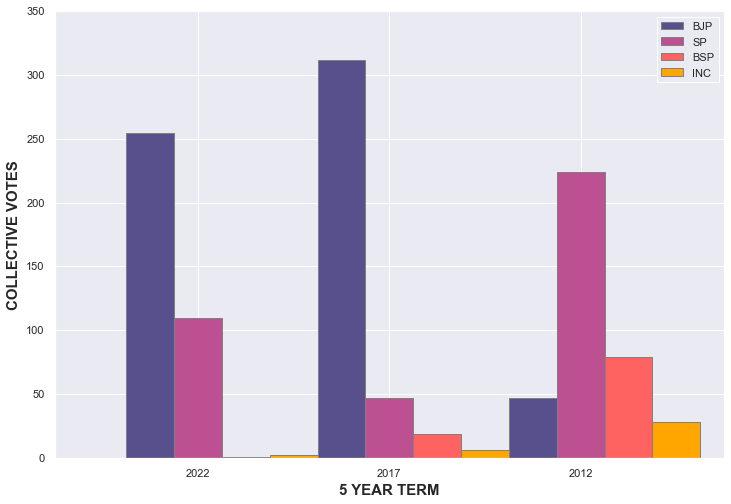

In [182]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
BJP = [BJP2022, BJP2017, BJP2012]
SP = [SP2022, SP2017, SP2012]
BSP = [BSP2022, BSP2017, BSP2012]
INC = [INC2022, INC2017, INC2012]
# Set position of bar on X axis
br1 = np.arange(len(BJP))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3] 
# Make the plot
plt.bar(br1, BJP, color ='#58508d', width = barWidth,
        edgecolor ='grey', label ='BJP')
plt.bar(br2, SP, color ='#bc5090', width = barWidth,
        edgecolor ='grey', label ='SP')
plt.bar(br3, BSP, color ='#ff6361', width = barWidth,
        edgecolor ='grey', label ='BSP')
plt.bar(br4, INC, color ='#ffa600', width = barWidth,
        edgecolor ='grey', label ='INC')

 
# Adding Xticks
plt.xlabel('5 YEAR TERM', fontweight ='bold', fontsize = 15)
plt.ylabel('COLLECTIVE VOTES', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(BJP))],
        ['2022', '2017', '2012'])
 
plt.legend()
plt.show()

# Plot 2

In [183]:
# Finding the districts with the no of cites
districtSum=mydata['District'].value_counts()

In [184]:
# First 10 districts with the maximum cities
First10=districtSum[:10]

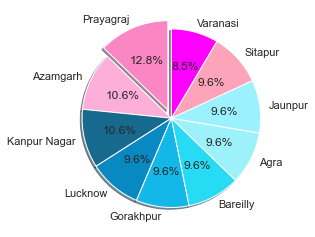

In [185]:
# Ploting the districts with the number of places
labels = First10.index
sizes = First10
 
colors = ( '#FA86C4','#FDAFDA','#17698E','#0989C2','#13B8E8','#27DBF5','#9df1fa','#9CF1fE','#FDA4BA','magenta') 
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
 
plt.show()

# Plot 3

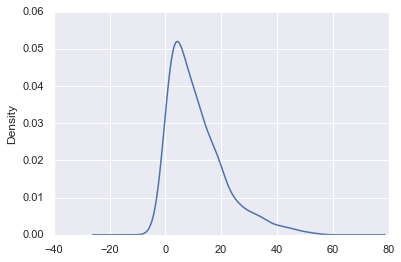

In [186]:
# Creating a line graph for 2022 Margin win of a party and its a lot
df1 = (pd.Series(mydata['2022 Margin%'])).astype(float, errors = 'raise')
df1.plot.kde();

# Plot 4

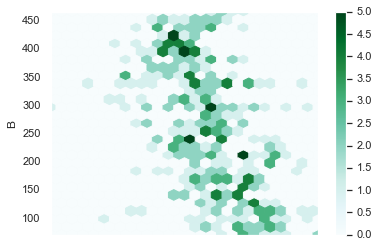

In [187]:
# Displaying the graph of places where the winning political party has a strong hold as its winning since long.
A=mydata['2022 Poll%'].astype(float, errors = 'raise')
B=mydata['2017 Poll%'].astype(float, errors = 'raise')
data = {'A':  A,
        'B': B
        }
df = pd.DataFrame(data)
df["B"] = df["B"] + np.arange(402)
df.plot.hexbin(x="A", y="B", gridsize=25);

# Recommendations

I would like to recommend that the two stable parties are BJP and SP the other parties and become almost extinct. so the relible parties are SP and BJP.we can see the future in them.
The second analysis **Praragraj** is the big disctrict we can focus on for the next term as to win the next election.
The next graph shows that the overall voting percentage area is increasing we can also focus the areas which which are still uncovered.
Lastly, I would like to recommend that the darker hexagons are the places which are reaquired by the same party so, those are will be difficult and the those area will need more effort to make a place.